# Visualize the result of a list of GANs

## Deep Convolutional GAN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# for compatible with python 3
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from dcgan import DCGAN
from utils import load_train_data, load_test_data

Using TensorFlow backend.


In [3]:
# load cifar10 dataset
train_samples = load_train_data() / 255.0
test_samples = load_test_data() / 255.0

In [4]:
dcgan = DCGAN()
dcgan.discriminator.summary()
dcgan.generator.summary()
dcgan.discriminator_generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        1568      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          32832     
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         131200    
__________

In [5]:
dis_losses, gen_losses = dcgan.train(train_samples)

Iteration 50: dis loss = 0.0109, gen loss = 0.0737
Iteration 100: dis loss = 0.0002, gen loss = 0.0091
Iteration 150: dis loss = 0.0000, gen loss = 0.0017
Iteration 200: dis loss = 0.0000, gen loss = 0.0001
Iteration 250: dis loss = 0.0000, gen loss = 0.0001
Iteration 300: dis loss = 0.0000, gen loss = 0.0003
Iteration 350: dis loss = 0.0011, gen loss = 1.9726
Iteration 400: dis loss = 0.0194, gen loss = 0.0776
Iteration 450: dis loss = 0.0001, gen loss = 0.0069
Iteration 500: dis loss = 0.0030, gen loss = 0.0008
Iteration 550: dis loss = 0.0001, gen loss = 0.0112
Iteration 600: dis loss = 0.0001, gen loss = 0.0157
Iteration 650: dis loss = 0.0000, gen loss = 0.0018
Iteration 700: dis loss = 0.0000, gen loss = 0.0072
Iteration 750: dis loss = 0.0001, gen loss = 0.0337
Iteration 800: dis loss = 0.1062, gen loss = 4.2955
Iteration 850: dis loss = 0.5456, gen loss = 1.2351
Iteration 900: dis loss = 0.9501, gen loss = 0.7761
Iteration 950: dis loss = 2.5386, gen loss = 1.4012
Iteration 100

Iteration 7800: dis loss = 1.4811, gen loss = 0.9564


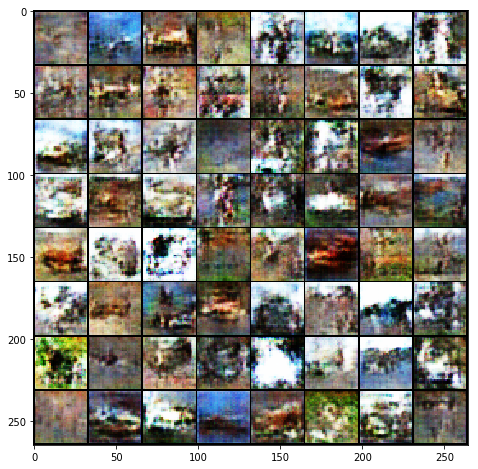

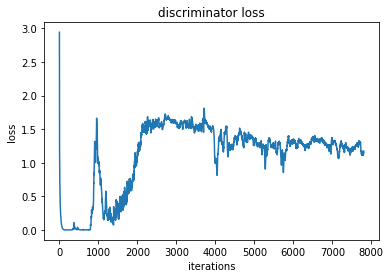

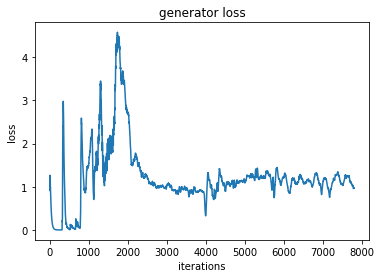

In [6]:
from utils import viz_grid
# visualize
tracked_noise = np.random.normal(0, 1, [64, 64])
fig = plt.figure(figsize = (8, 8))   
ax1 = plt.subplot(111)
ax1.imshow(viz_grid(dcgan.generate(tracked_noise), 1))
plt.show()

plt.plot(dis_losses)
plt.title('discriminator loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

plt.plot(gen_losses)
plt.title('generator loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()